In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../../')
import experiments

curves = 4
curve_labels = ['k=0.25', 'k=1', 'k=4', 'k=1, rand label']
curve_colors = ['blue', 'green', 'orange', 'red']
sizes = 5
size_factors = [0.25, 0.5, 1, 2, 4]
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
crosses = 3

results = np.zeros((curves, sizes, 3))
results_test = np.zeros((curves, sizes, 3))
# both are indexed [size_factor][nn_type][mean/lowererr/uppererr]
# we have to make sure to not be sketchy and state that these are averages between samplings and not nets

id_list = [217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 234, 235, 236, 237, 238]

for ID in id_list:

    print('Processing ID:', ID)
    opt = experiments.opt[ID]

    curve_idx = 1  # unregularized
    if opt.hyper.lr_bs_factor==0.25:
        curve_idx = 0 
    elif opt.hyper.lr_bs_factor==4:
        curve_idx = 2
    if opt.dataset.random_labels:
        curve_idx = 3    
    size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

    csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    nonselective = np.array([df[df['cross_validation'] == i][df['evaluation_set'] == 'train'][df['layer'] == 'all']
                             ['not_selective'].iloc[0] for i in range(crosses)])
    nonselective_test = np.array([df[df['cross_validation'] == i][df['evaluation_set'] == 'test'][df['layer'] == 'all']
                                  ['not_selective'].iloc[0] for i in range(crosses)])
    results[curve_idx, size_idx, 0] = np.mean(nonselective)
    results[curve_idx, size_idx, 1] = results[curve_idx][size_idx][0] - np.min(nonselective)
    results[curve_idx, size_idx, 2] = np.max(nonselective) - results[curve_idx][size_idx][0]
    results_test[curve_idx, size_idx, 0] = np.mean(nonselective_test)
    results_test[curve_idx, size_idx, 1] = results_test[curve_idx][size_idx][0] - np.min(nonselective_test)
    results_test[curve_idx, size_idx, 2] = np.max(nonselective_test) - results_test[curve_idx][size_idx][0]

results *= 100
results_test *= 100

Processing ID: 217
Processing ID: 218
Processing ID: 219
Processing ID: 220
Processing ID: 221
Processing ID: 222
Processing ID: 223
Processing ID: 224
Processing ID: 225
Processing ID: 226
Processing ID: 227
Processing ID: 228
Processing ID: 229
Processing ID: 230
Processing ID: 231
Processing ID: 234
Processing ID: 235
Processing ID: 236
Processing ID: 237
Processing ID: 238


/cm/shared/openmind/anaconda/2.5.0/lib/python3.5/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


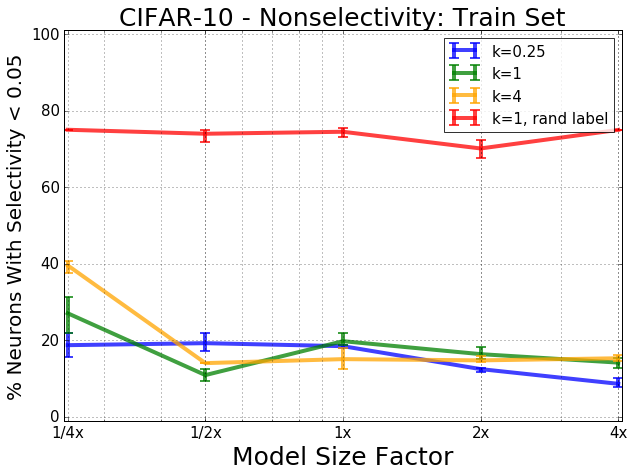

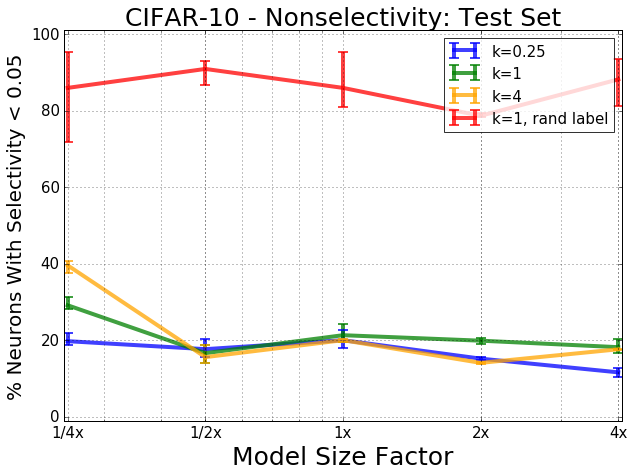

In [3]:
# first plot train curves

% matplotlib inline
plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Nonselectivity: Train Set', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('% Neurons With Selectivity < 0.05', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(size_factors, results[curve_idx, :, 0], yerr=results[curve_idx, :, 1:].T,
                 color=curve_colors[curve_idx], linestyle='-', 
                 linewidth=4, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='upper right', framealpha=0.8, fontsize=15)

plt.show()

# second plot test curves

plt.figure(figsize=(10, 7))
plt.title('CIFAR-10 - Nonselectivity: Test Set', fontsize=25)
plt.xlabel('Model Size Factor', fontsize=25)
plt.ylabel('% Neurons With Selectivity < 0.05', fontsize=20)
plt.xlim((0.245, 4.07))
plt.ylim((-1, 101))
plt.grid(True, which='both', c='black')
plt.xscale('log')
plt.xticks(size_factors, size_labels, fontsize=15)
plt.yticks([0, 20, 40, 60, 80, 100], fontsize=15)

for curve_idx in range(curves):
    plt.errorbar(size_factors, results_test[curve_idx, :, 0], yerr=results_test[curve_idx, :, 1:].T,
                 color=curve_colors[curve_idx], linestyle='-', 
                 linewidth=4, capsize=5, capthick=2, alpha=0.75)
plt.legend(curve_labels, loc='upper right', framealpha=0.8, fontsize=15)

plt.show()
